In [121]:
import qiskit
print(qiskit.__version__)

0.18.2


# 1.1 Load Data

In [140]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2

train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(training_size = 20, test_size = 5, 
                                                                                    n = adhoc_dimension, gap=0.3,
                                                                                    plot_data =False, one_hot=False,
                                                                                    include_sample_total=True)

In [141]:
import numpy
print(numpy.array(adhoc_total).shape)

(100, 100)


In [142]:
print("train data shape: ", train_features.shape,"\ttrain labels shape: ", train_labels.shape)
print("test data shape:  ", test_features.shape,"\ttest labels shape:  ", test_labels.shape)

train data shape:  (40, 2) 	train labels shape:  (40,)
test data shape:   (10, 2) 	test labels shape:   (10,)


In [143]:
print('train data:\n',train_features[:5])
print('\ntrain label:\n',train_labels[:5])

train data:
 [[1.50796447 4.52389342]
 [3.39292007 4.27256601]
 [3.0787608  4.64955713]
 [2.82743339 4.83805269]
 [1.38230077 0.37699112]]

train label:
 [0 0 0 0 0]


In [144]:
# plot_adhoc_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

# 1.2 Simulator

In [145]:
from qiskit import Aer
from qiskit.utils import QuantumInstance

seed=20
quantum_instance = QuantumInstance(Aer.get_backend("qasm_simulator"), shots=1024,
                                   seed_simulator=seed, seed_transpiler=seed)

# 1.3 SVM

# 1.1.1 Kernel set up for ZFeatureMap

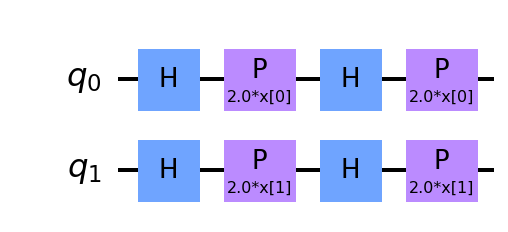

In [146]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

z_feature_map = ZFeatureMap(feature_dimension=adhoc_dimension, reps=2)
z_kernel = QuantumKernel(feature_map = z_feature_map, quantum_instance=quantum_instance)

# z_feature_map.draw(output='mpl', scale=2)
z_feature_map.decompose().draw(output='mpl', scale=2)

# 1.1.2 SVM set up

In [147]:
from sklearn.svm import SVC

svc = SVC(kernel=z_kernel.evaluate)
svc.fit(train_features, train_labels)
score = svc.score(test_features, test_labels)
print('Callable kernel with ZFeatureMap classification test score: ', score)
prediction = svc.predict(test_features)
print(prediction)

Callable kernel with ZFeatureMap classification test score:  0.6
[0 1 1 1 0 1 1 1 0 1]


# 1.2.1 Kernel set up for ZZFeatureMap

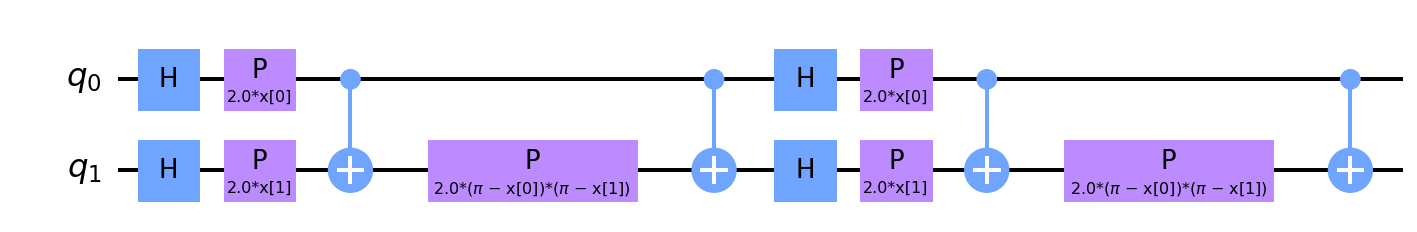

In [148]:
from qiskit.circuit.library import ZZFeatureMap

zz_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement='linear')
zz_kernel = QuantumKernel(feature_map = zz_feature_map, quantum_instance=quantum_instance)

zz_feature_map.decompose().draw(output='mpl', scale=2)

# 1.2.2 SVM set up

In [149]:
from sklearn.svm import SVC

svc = SVC(kernel=zz_kernel.evaluate)
svc.fit(train_features, train_labels)
score = svc.score(test_features, test_labels)
print('Callable kernel with ZZFeatureMap classification test score: ', score)
prediction = svc.predict(test_features)
print(prediction)

Callable kernel with ZZFeatureMap classification test score:  1.0
[0 0 0 0 0 1 1 1 1 1]


# 1.4 Quatum SVM

In [ ]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC()
qsvc.quantum_kernel.quantum_instance = quantum_instance

qsvc.fit(train_features, train_labels)
score = qsvc.score(test_features, test_labels)
print('QSVC classification test score: ', score)
prediction = qsvc.predict(test_features)
print(prediction)

QSVC classification test score:  1.0


# Tutorial

For "ZFeatureMap": 

if  "feature_dimension" = n,     it will give n-qubit i.e. n- horizontal line(in figure).

if  "reps" = n, means it will repeat the circuit n times.

In [ ]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

# here feature_dimension = 2 and reps = 1

adhoc_dimension = 2
z_feature_map = ZFeatureMap(feature_dimension=adhoc_dimension, reps=1)
z_kernel = QuantumKernel(feature_map = z_feature_map, quantum_instance=quantum_instance)

z_feature_map.decompose().draw(output='mpl', scale=2)

In [ ]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

# here feature_dimension = 2 and reps = 2

adhoc_dimension = 2
z_feature_map = ZFeatureMap(feature_dimension=adhoc_dimension, reps=2)
z_kernel = QuantumKernel(feature_map = z_feature_map, quantum_instance=quantum_instance)

z_feature_map.decompose().draw(output='mpl', scale=2)

In [ ]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

# here feature_dimension = 3 and reps = 4

adhoc_dimension = 3
z_feature_map = ZFeatureMap(feature_dimension=adhoc_dimension, reps=4)
z_kernel = QuantumKernel(feature_map = z_feature_map, quantum_instance=quantum_instance)

z_feature_map.decompose().draw(output='mpl', scale=2)

# See the Difference for ZZFeatureMap

In [ ]:
# same happens for ZZFeatureMap

from qiskit.circuit.library import ZZFeatureMap

adhoc_dimension=2
zz_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=1, entanglement='linear')
zz_kernel = QuantumKernel(feature_map = zz_feature_map, quantum_instance=quantum_instance)

zz_feature_map.decompose().draw(output='mpl', scale=2)

In [ ]:
# same happens for ZZFeatureMap

from qiskit.circuit.library import ZZFeatureMap

adhoc_dimension=2
zz_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement='linear')
zz_kernel = QuantumKernel(feature_map = zz_feature_map, quantum_instance=quantum_instance)

zz_feature_map.decompose().draw(output='mpl', scale=2)

In [ ]:
# same happens for ZZFeatureMap

from qiskit.circuit.library import ZZFeatureMap

adhoc_dimension=3
zz_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=1, entanglement='linear')
zz_kernel = QuantumKernel(feature_map = zz_feature_map, quantum_instance=quantum_instance)

zz_feature_map.decompose().draw(output='mpl', scale=2)

In [ ]:
# same happens for ZZFeatureMap

from qiskit.circuit.library import ZZFeatureMap

adhoc_dimension=3
zz_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement='linear')
zz_kernel = QuantumKernel(feature_map = zz_feature_map, quantum_instance=quantum_instance)

zz_feature_map.decompose().draw(output='mpl', scale=2)